# Exploratory Data Analysis


In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [10]:
ECLSK2011 = pd.read_csv('ECLSK2011.csv')

In [11]:
#0: None
#1: 8TH GRADE OR BELOW
#2: 9TH - 12TH GRADE
#3: HIGH SCHOOL DIPLOMA/EQUIVALENT
#4: VOC/TECH PROGRAM
#5: SOME COLLEGE
#6: BACHELOR'S DEGREE
#7: GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE
#8: MASTER'S DEGREE
#9: DOCTORATE OR PROFESSIONAL DEGREE
#-9: NOT ASCERTAINED

In [12]:
# The first recording of the edcucation levels was recorded as X12, so it was encoded in the csv as the value for the first two time values
# This measurment recorded the education level at a max of 8, so values of 9 were also included in this category

In [13]:
labels = {
    -9: 'NOT ASCERTAINED',
    0: 'None',
    1: '8th Grade or Below',
    2: '9th - 12th Grade',
    3: 'High School Diploma/Equivalent',
    4: 'Voc/Tech Program',
    5: 'Some College',
    6: 'Bachelor\'s Degree',
    7: 'Graduate/Professional School - No Degree',
    8: 'Master\'s Degree',
    9: 'Doctorate or Professional Degree'
}
sns.set(font_scale=0.5)

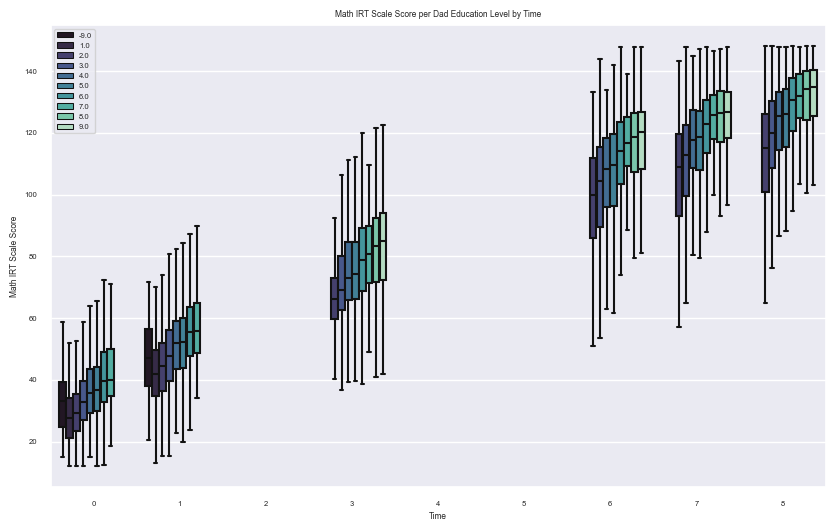

In [14]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='TIME', y='MATH', hue='DADED', data=ECLSK2011, palette='mako', showfliers=False)
plt.title('Math IRT Scale Score per Dad Education Level by Time')
plt.xlabel('Time')
plt.ylabel('Math IRT Scale Score')

plt.legend()
plt.show()

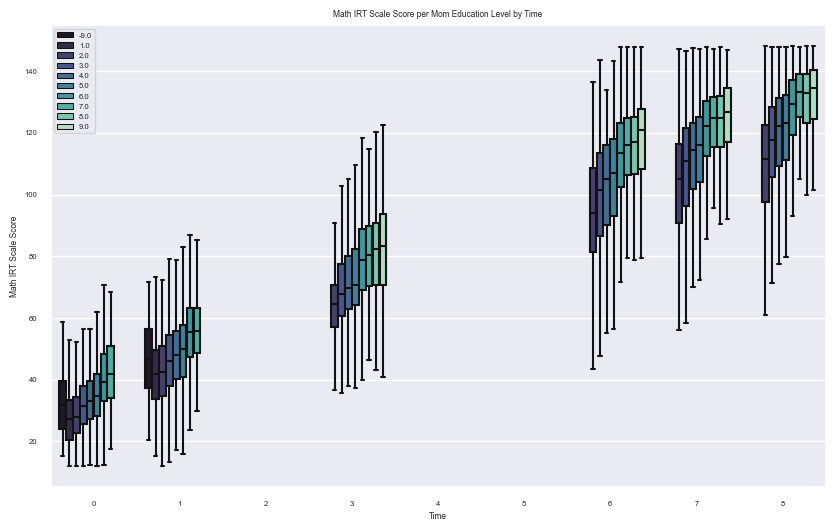

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TIME', y='MATH', hue='MOMED', data=ECLSK2011, palette='mako', showfliers=False)
plt.title('Math IRT Scale Score per Mom Education Level by Time')
plt.xlabel('Time')
plt.ylabel('Math IRT Scale Score')

plt.legend()
plt.show()

In [16]:
'''
# Faceted plot, but it's too dense considering there are 81 unique combinations of DADED and MOMED
ECLSK2011_filtered = ECLSK2011[['TIME', 'MATH', 'DADED', 'MOMED']]

unique_daded = ECLSK2011_filtered['DADED'].unique()
unique_momed = ECLSK2011_filtered['MOMED'].unique()

a = len(unique_daded)
b = len(unique_momed)

fig, axes = plt.subplots(a, b, figsize=(150, 150))

for i, daded in enumerate(unique_daded):
    for j, momed in enumerate(unique_momed):
        ax = axes[i, j]
        data_subset = ECLSK2011_filtered[(ECLSK2011_filtered['DADED'] == daded) & (ECLSK2011_filtered['MOMED'] == momed)]
        ax.scatter(data_subset['TIME'], data_subset['MATH'], marker='o')
        ax.set_title(f"DADED: {daded}, MOMED: {momed}")
        ax.set_xlabel('TIME')
        ax.set_ylabel('MATH')

plt.tight_layout()

plt.show()
'''

'\n# Faceted plot, but it\'s too dense considering there are 81 unique combinations of DADED and MOMED\nECLSK2011_filtered = ECLSK2011[[\'TIME\', \'MATH\', \'DADED\', \'MOMED\']]\n\nunique_daded = ECLSK2011_filtered[\'DADED\'].unique()\nunique_momed = ECLSK2011_filtered[\'MOMED\'].unique()\n\na = len(unique_daded)\nb = len(unique_momed)\n\nfig, axes = plt.subplots(a, b, figsize=(150, 150))\n\nfor i, daded in enumerate(unique_daded):\n    for j, momed in enumerate(unique_momed):\n        ax = axes[i, j]\n        data_subset = ECLSK2011_filtered[(ECLSK2011_filtered[\'DADED\'] == daded) & (ECLSK2011_filtered[\'MOMED\'] == momed)]\n        ax.scatter(data_subset[\'TIME\'], data_subset[\'MATH\'], marker=\'o\')\n        ax.set_title(f"DADED: {daded}, MOMED: {momed}")\n        ax.set_xlabel(\'TIME\')\n        ax.set_ylabel(\'MATH\')\n\nplt.tight_layout()\n\nplt.show()\n'